### Mechanistic Model

Based on the decision to model the substrate (glucose), biomass and $CO_2$ production for both fermentations, the first step is therefore the collection of potential reaction kinetics and literature parameter values. In the figure below, the correlation of these three molecules are presented.

In both experiments, glucose is the only substrate for *Corynebacterium glutamicum*. How much glucose is consumed by the microorganism is described by the **glucose uptake rate $q_s$**. The uptaken glucose is the energy supply for many processes within the cell such as growth, **maintenance $m_s$**, product formation. The growth is described by the **growth rate $\mu$** which is calculated from $\mu = q_s  Y_{xs}$. During the glucose processing $CO_2$ is produced. However, there is no induction of product formation which is the reason of excluding it from the balance. 

<img src="images/MechanisticModel.png"
     alt="Mechanistic Model of one cell"
     width="600"/>

**Batch No.1**

The library of reaction kinetics is found in the file B_model.py in the functions **mu_eq** and **qs_eq**. By uncommenting one equation for each qs and mu and adapting the input parameters for the function, the model can easily be modified. The values for the required parameters such as $Y_{xs}$, $Y_{co2x}$, $\mu_{max}$, $X_{max}$, $K_s$, $K_i$, $q_{s,max}$, $m_s$ and lag are taken from the file called config.yml.
- using parameters from literature
- description of parameters

**Batch No.2**
- splitting the fermentation into 2 parts
- comparison of parameters from literature and calculated

A in depth description of the model and its parameters is found in part C.

### Code

In [1]:
import pandas as pd
from B_model import model_batch_no1, model_batch_no2
from B_model import plot_simulation_no1, plot_simulation_no2

**Batch No.1 -- Finding suitable reaction kinetics**

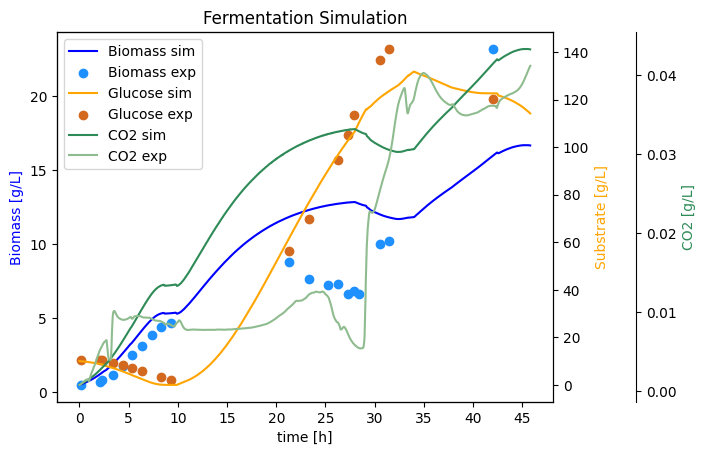

In [2]:
delta_t = 1 # sampling frequency in minutes
time, biomass, substrate, co2 = model_batch_no1(delta_t)
plot_simulation_no1(time, biomass, substrate, co2, 'Fermentation - first mechanistic model')

**Batch No.2 -- Segment fermentation into 2 phases: Batch phase & Fed-batch phases**

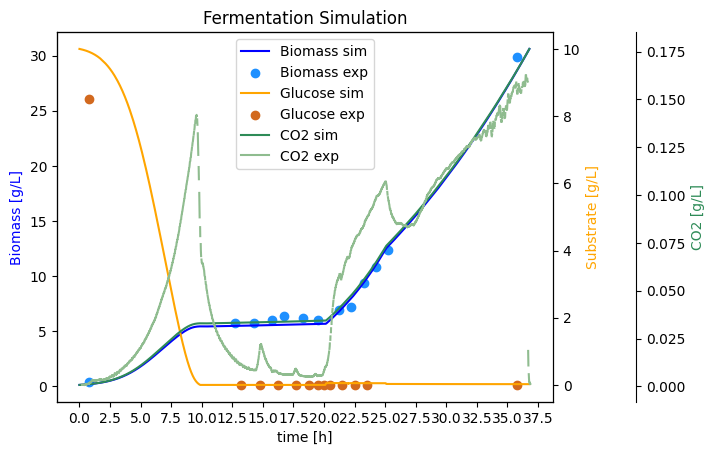

In [3]:
delta_t = 1 # sampling frequency in minutes
time, biomass, substrate, co2 = model_batch_no2(delta_t)
plot_simulation_no2(time, biomass, substrate, co2, 'Fermentation with 2 stages')